<a href="https://colab.research.google.com/github/MrGuidry/CS4650/blob/Homework5/CS4650_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg

In [93]:
import spacy
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='4589cfd31f814a91bf1f106e79094f92')

In [103]:
#List of each page we are getting (5 pages each with 20 articles)
articles = []

for x in range(1, 6):
  articles.append(newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-22', to='2021-03-21', sort_by='relevancy', page=x))

In [104]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
import pandas as pd
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head(100)

In [109]:
def get_keywords_eng(content):
  result = []
  cont = nlp_eng(content)
  nlp_eng.Defaults.stop_words
  pos_tag = ["VERB","NOUN","PROPN"]
  for token in cont:
    if (token.text in nlp_eng.Defaults.stop_words or token.pos_ is "PUNCT"):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

In [129]:
from collections import Counter

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
df.head(100)
df.to_excel("output.xlsx")

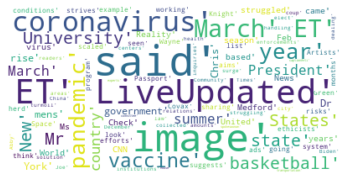

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud.png', dpi=100)
plt.show()